# Curso de Machine Learning
# Estadística
## Sebastian Filipigh, Luis Duarte, Magdalena Lucini
### Agosto 2023, FaCENA - UNNE
### contact:  sfilipigh@comunidad.unne.edu.ar; luis.duarte@comunidad.unne.edu.ar; mmlucini@comunidad.unne.edu.ar



**Objetivos:**


*   Explorar un conjunto de datos reales y hacer un breve análisis estadístico.
*   Trabajar con distribuciones de probabilidad en situaciones reales..

Datos obtenidos de NOAA (National Centers for Enviromental Information); contiene variables climáticas de las ciudades de Resistencia y Corrientes desde el 01/01/2000 al 19/08/2023.

**Antes de empezar:**

Necesitamos importar las siguientes librerias:

- matplotlib (gráficos en 2D)
- seaborn (visualización de datos estadísticos)
- pandas (estructuras de datos y análisis de herramientas de datos)

In [1]:
%matplotlib inline
%pylab inline
import seaborn as sns
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(10,10) # graph size

Populating the interactive namespace from numpy and matplotlib


## Primera parte: Análisis exploratorio de los datos ##


1.1) Importe la base de datos y realice un análisis estadístico exploratorio de sus variables.

a) Si trabaja en google colab:



In [ ]:
from google.colab import files
uploaded = files.upload()




Saving datos_ctes_1.csv to datos_ctes_1.csv


In [ ]:
import pandas as pd
import io

data1 = pd.read_csv(io.BytesIO(uploaded['datos_ctes_1.csv']))


b) Si no trabaja en google colab, importe los datos desde un directorio local (especifique path de ser necesario).


In [ ]:
# importación de datos
data1 = pd.read_csv('datos_ctes_1.csv')



*   Observe qué variables tiene la base de datos.
*   Obtenga las medidas de resumen para las variables.



In [ ]:
# Observemos con qué variables cuenta esta base de datos:
data1

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,ARM00087166,"CORRIENTES, AR",2000-01-01,0.0,24.4,31.0,16.9
1,ARM00087166,"CORRIENTES, AR",2000-01-02,0.0,25.4,NaN,18.4
2,ARM00087166,"CORRIENTES, AR",2000-01-03,0.0,26.8,32.2,19.3
3,ARM00087166,"CORRIENTES, AR",2000-01-04,0.0,25.1,NaN,17.5
4,ARM00087166,"CORRIENTES, AR",2000-01-05,0.0,25.2,NaN,16.7
...,...,...,...,...,...,...,...
17126,AR000087155,"RESISTENCIA AERO, AR",2023-08-15,NaN,22.6,NaN,12.8
17127,AR000087155,"RESISTENCIA AERO, AR",2023-08-16,NaN,27.3,NaN,18.0
17128,AR000087155,"RESISTENCIA AERO, AR",2023-08-17,NaN,28.7,NaN,22.0
17129,AR000087155,"RESISTENCIA AERO, AR",2023-08-18,27.9,19.4,NaN,15.5


In [ ]:
# Obtengamos las medidas de resumen:
data1.describe()

,PRCP,TAVG,TMAX,TMIN
count,7089.000000,17128.000000,8255.000000,13063.000000
mean,7.680660,21.516114,28.787717,15.398461
std,18.214458,5.680426,6.313506,6.143840
min,0.000000,4.100000,8.000000,-3.900000
25%,0.000000,17.700000,24.500000,11.400000
50%,0.000000,22.300000,29.600000,16.400000
75%,6.100000,25.800000,33.600000,20.100000
max,300.000000,37.100000,44.400000,31.000000


In [ ]:
# Asegurémonos que la variable DATE esté codificada como fecha:
type(data1['DATE'])
data1['DATE'] = pd.to_datetime(data1['DATE'], format='%Y-%m-%d')


*   Filtre la base de datos por ciudad, de los últimos cinco años.
*  Elimine las filas con datos faltantes.

In [ ]:
# Filtramos los datos por ciudad:
data_ctes=data1[data1['NAME']=='CORRIENTES, AR']
data_rcia= data1[data1['NAME']=='RESISTENCIA AERO, AR']

# Eliminamos las filas con datos faltantes:
dc=data_ctes.dropna(how='any') #dropna(how='any') elimina filas con datos faltantes.
dr=data_rcia.dropna(how='any')


In [ ]:
# Filtramos los datos desde Agosto del 2018 a la actualidad:
import datetime as dt
dc_act= dc[(dc['DATE'].dt.strftime('%Y') >= '2018') & (dc['DATE'].dt.strftime('%m') > '07')]
dr_act= dr[(dr['DATE'].dt.strftime('%Y') >= '2018') & (dr['DATE'].dt.strftime('%m') > '07')]



*   Realice un gráfico que les permita ver la evolución de la temepratura media de ambas ciudades en los últimos 5 años.





Text(0.5, 1.0, 'Evolución de la temperatura media- Rcia')

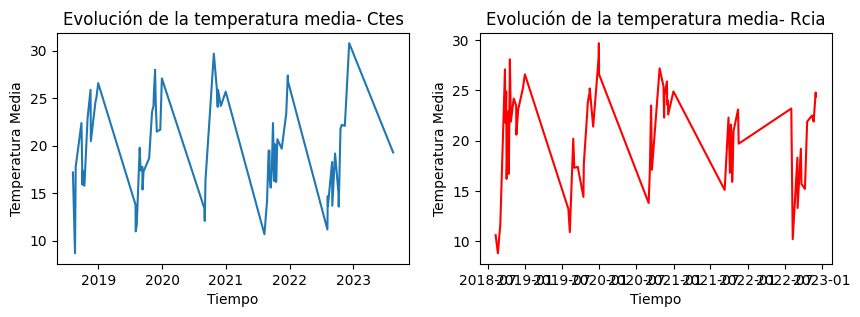

In [ ]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(dc_act.DATE, dc_act.TAVG)
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Temperatura Media')
ax1.set_title('Evolución de la temperatura media- Ctes')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(dr_act.DATE, dr_act.TAVG, 'r')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Temperatura Media')
ax2.set_title('Evolución de la temperatura media- Rcia')

Text(0.5, 1.0, 'Temperaturas medias JJA (invierno) y DEF (verano) en Resistencia')

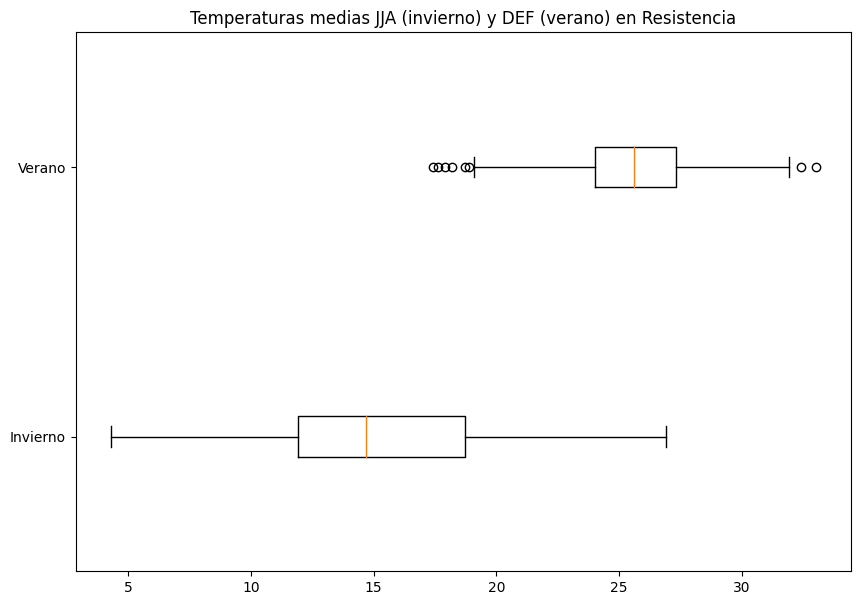

In [ ]:

# Filter in a range of  months
#print(dr['DATE'].dt.strftime('%m'))
dr_inv = dr[(dr['DATE'].dt.strftime('%m') >= '06') & (dr['DATE'].dt.strftime('%m') < '09')]
dr_ver = dr[(dr['DATE'].dt.strftime('%m') == '12') | (dr['DATE'].dt.strftime('%m') < '03')]
#dr2 = dr[(dr['DATE'].dt.strftime('%m') == '06')]
fig = figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.boxplot([dr_inv.TAVG,dr_ver.TAVG],vert=0)
ax.set_yticklabels(['Invierno', 'Verano'])
title('Temperaturas medias JJA (invierno) y DEF (verano) en Resistencia')

[Text(0, 1, 'Corrientes'), Text(0, 2, 'Resistencia')]

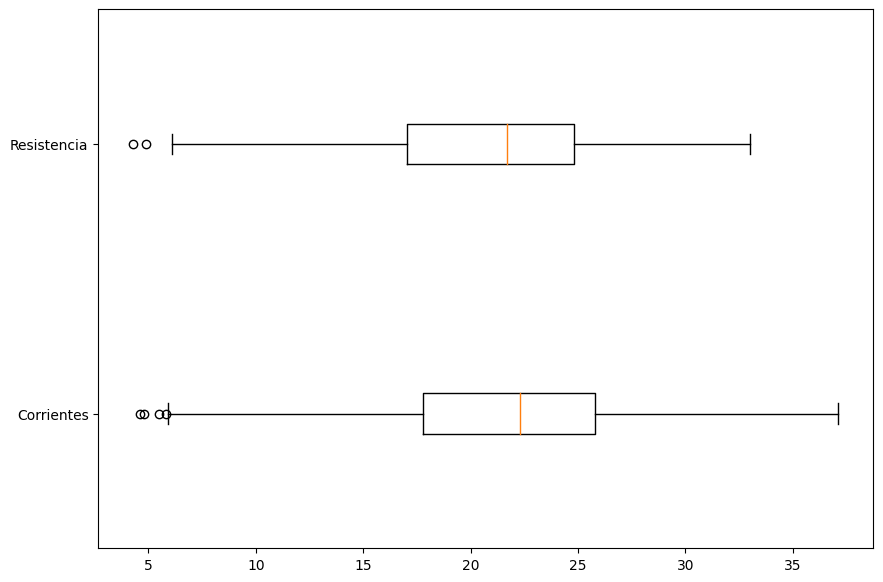

In [ ]:
#Observemos la variabilidad de las temperaturas medias en ambas ciudades, utilizando Boxplot:
data_rcia=data_rcia.dropna(how='any')
fig = figure(figsize =(10, 7))
ax = fig.add_subplot(111)
boxplot([data_ctes.TAVG,data_rcia.TAVG],vert=0)
ax.set_yticklabels(['Corrientes', 'Resistencia'])

1.2) Trazar el histograma de las temperaturas medias de la ciudad de Corrientes y comentar los resultados. Puedes usar la función *histplot* de la biblioteca *seaborn* (*sns*).

Text(0.5, 1.0, 'Histograma de temperaturas medias en Corrientes')

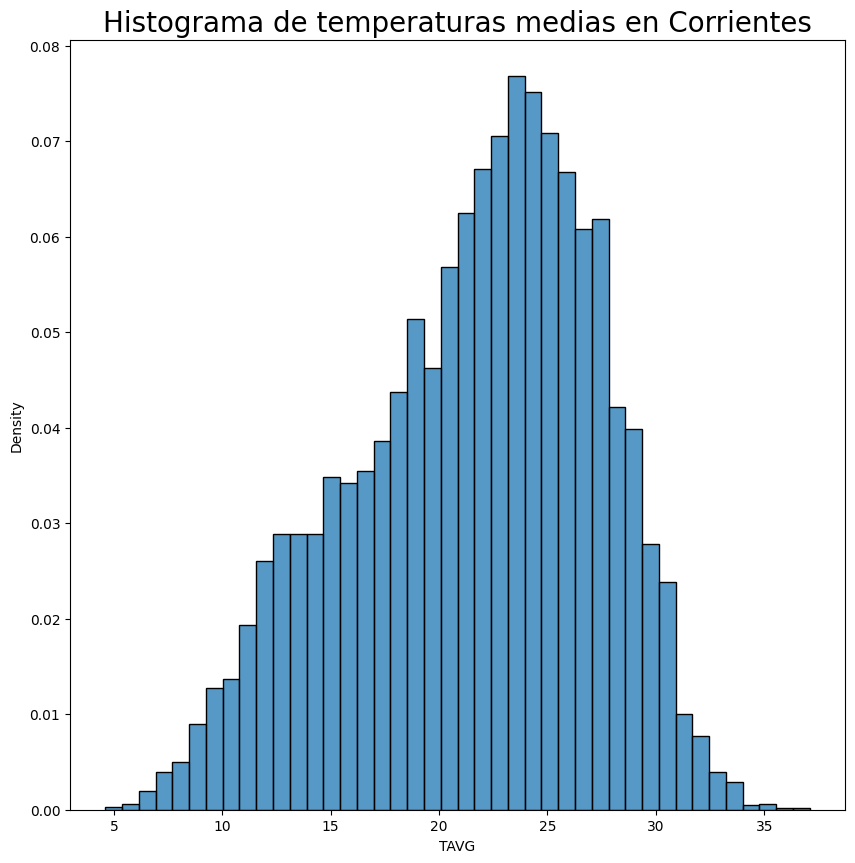

In [ ]:
# Realizar un Histograma de la temperatura media de la ciudad de Corrientes:
sns.histplot(data_ctes.TAVG, stat='density')
title('Histograma de temperaturas medias en Corrientes', size=20)

1.3) a) Queremos ajustar una distribución normal para la temperatura media de la Ciudad de Corrientes. Calculamos la función de logverosimilitud de las observaciones para diferentes valores de la media (por ejemplo, $20 \leq \mu \leq 30$) y la desviación estándar (por ejemplo, $0,1 \leq \sigma \leq 5$).

b) Verifique que la media y la desviación estándar muestrales correspondan al máximo de la función de logverosimilitud.

Logverosimilitud de la media y la desviación estandar muestrales: -26687.56333551749


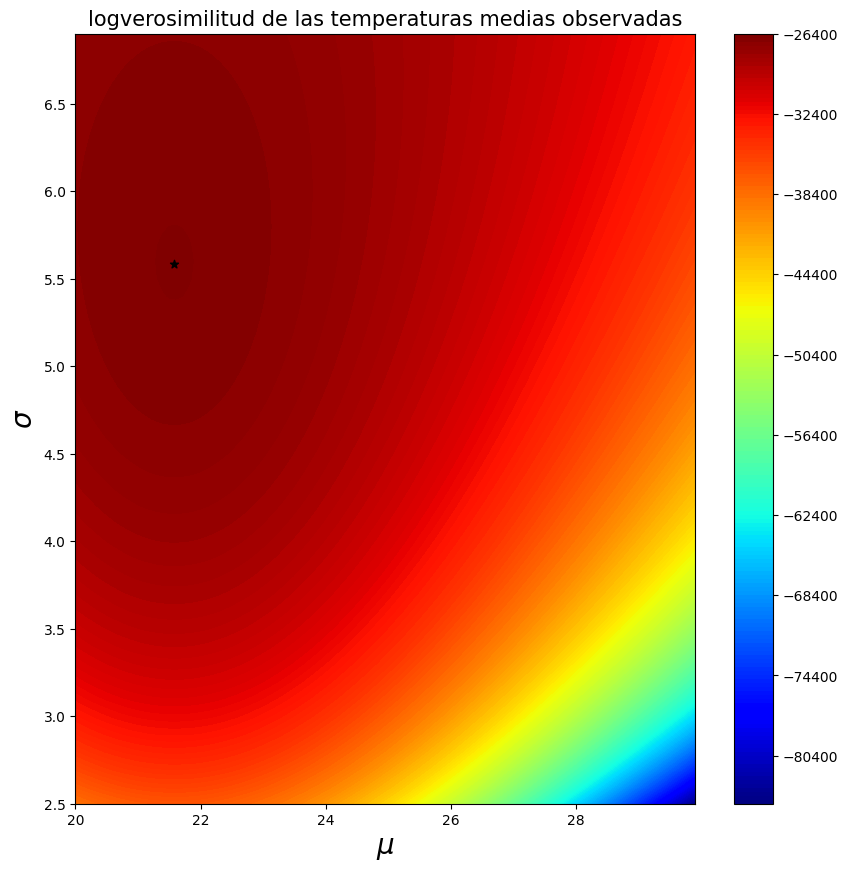

In [ ]:
from scipy.stats import norm

# posibles valores de la media (mu)y la desviación estandar (sigma)
range_mu = arange(20, 30, 0.1)
range_sigma = arange(2.5, 7, 0.1)

# calculo para la función de logverosimilitud para cada par de (mu, sigma)
tab_ML = zeros((len(range_mu), len(range_sigma)))
for i_mu in range(len(range_mu)):
  for i_sigma in range(len(range_sigma)):
    tab_ML[i_mu, i_sigma] = sum(norm.logpdf(data_ctes.TAVG, loc=range_mu[i_mu], scale=range_sigma[i_sigma]))

# plot results
RANGE_sigma, RANGE_mu = np.meshgrid(range_sigma, range_mu)
contourf(RANGE_mu, RANGE_sigma, tab_ML, 200, cmap='jet')
colorbar()
xlabel('$\mu$', size=20)
ylabel('$\sigma$', size=20)
title('logverosimilitud de las temperaturas medias observadas', size=15)

#############
### b)    ###

# comprobar que la media y la desviación estándar muestrales producen el máximo de la función de logverosimilitud:

print('Logverosimilitud de la media y la desviación estandar muestrales:',
      sum(norm.logpdf(data_ctes.TAVG, loc=mean(data_ctes.TAVG), scale=std(data_ctes.TAVG))))
scatter(mean(data_ctes.TAVG), std(data_ctes.TAVG), marker='*', color='k')

### TO DO ###
#############

1.4) Ajuste una distribución normal para la temperatura media de la ciudad de Corrientes y analice la calidad del ajuste.

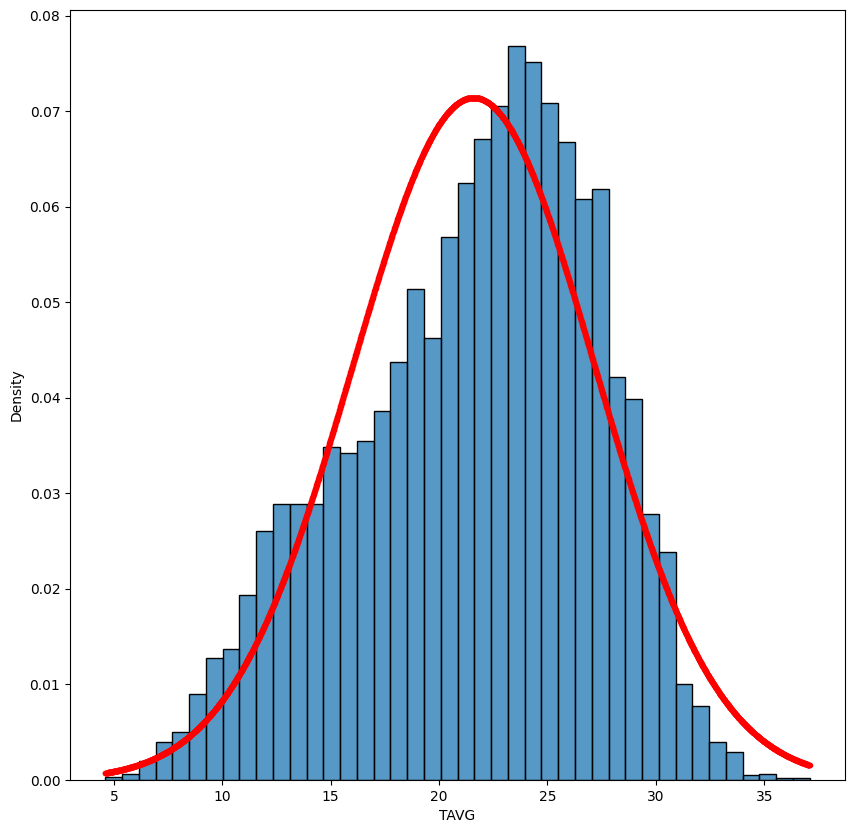

In [ ]:
#gráfico: histograma de TAVG y densidad de distribución normal con parámetros EMV.

sns.histplot(data_ctes.TAVG, stat='density')
x_axis = np.arange(np.min(data_ctes.TAVG), np.max(data_ctes.TAVG), 0.01)
fit_TAVG = norm.pdf(x_axis, loc=mean(data_ctes.TAVG), scale=std(data_ctes.TAVG))
plot(x_axis, fit_TAVG, 'r.', label='Normal')

1.5) Utilizando GMM, ajuste una mezcla de k distribuciones normales para TAVG. Para cada valor de K evalue la calidad de ajuste.

Logverosimilitud para mezcla de4distribuciones normales: -26351.67059158129


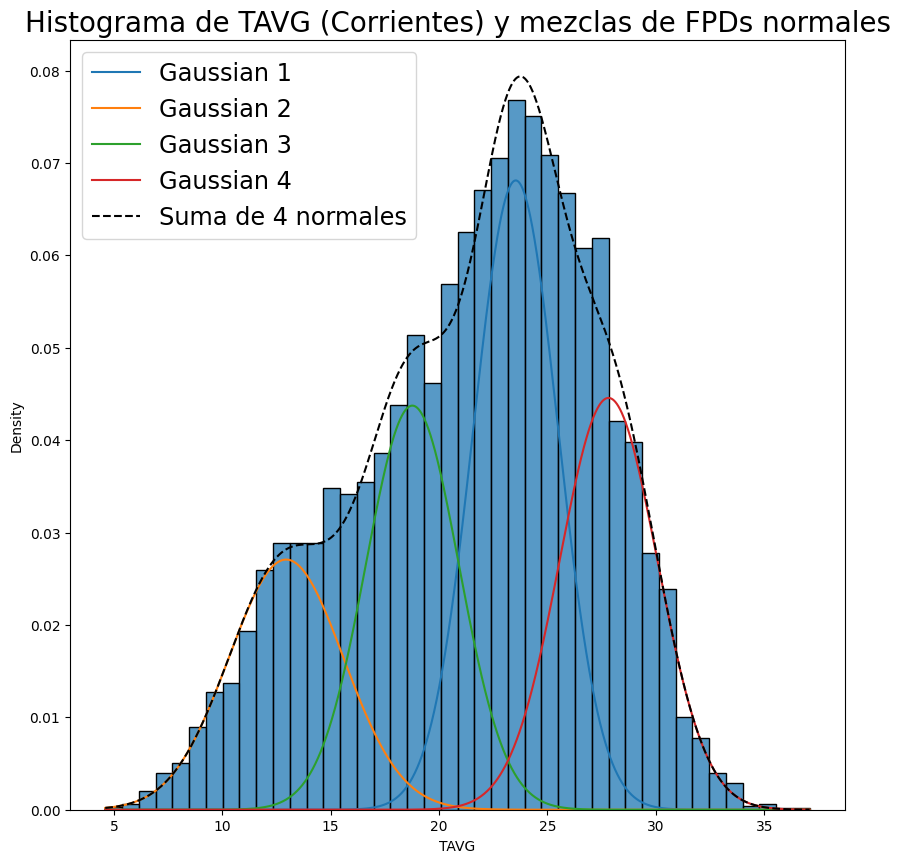

In [ ]:
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# número de FDPs normales.
K=4

# ajustar una mezcla de k distrubuciones normales.

gmm = GaussianMixture(n_components=K).fit(array([data_ctes.TAVG]).T)
means = ravel(gmm.means_)
variances = ravel(gmm.covariances_)
weights = ravel(gmm.weights_)

# plot the 1D-histogram and the fit using K Gaussian distributions
sns.histplot(data_ctes.TAVG, stat='density')
x_axis = np.arange(np.min(data_ctes.TAVG), np.max(data_ctes.TAVG), 0.01)
total_fit_TAVG = zeros(len(x_axis))
for k in range(K):
  fit_TAVG = norm.pdf(x_axis, means[k], sqrt(variances[k]))*weights[k]
  total_fit_TAVG += fit_TAVG
  plot(x_axis, fit_TAVG, label='Gaussian ' + str(k+1))
plot(x_axis, total_fit_TAVG, 'k--', label='Suma de ' + str(K) + ' normales')
title('Histograma de TAVG (Corrientes) y mezclas de FPDs normales', size=20)
legend(fontsize = 'xx-large')

# cálculo de la logverosimilitud para mezcla de K distribuciones normales.
print('Logverosimilitud para mezcla de' + str(K) + 'distribuciones normales:',
      sum(gmm.score_samples(array([data_ctes.TAVG]).T)))

1.6) Realizar el mismo análisis para la temperatura mínima de la ciudad de Resistencia. ¿Es necesario conciderar mezcla de distribuciones normales? (TAREA)

1.7) Calcule la covarianza y la correlación entre SST y SSH, utilizando las funciones *cov* y *corrcoef*, respectivamente. Explique cada elemento de la matriz de covarianza. Compruebe también las relaciones entre correlación y covarianza.

In [ ]:
#############
### TO DO ###

# Matriz de covarianza
cov_ctes_rcia_TAVG = cov(data_ctes.TAVG, data_rcia.TAVG)
print('Covarianza entre las temperaturas medias de Ctes y Rcia:')
print(str(cov_ctes_rcia_TAVG))

# coeficientes de correlación
corr_ctes_rcia_TAVG = corrcoef(data_ctes.TAVG, data_rcia.TAVG)
print('Correlacionentre las temperaturas medias de Ctes y Rcia: ' + str(corr_ctes_rcia_TAVG[0,1]))

# verificar la relación entre la covarianza y la correlación
print(cov_ctes_rcia_TAVG[0,1] / (sqrt(cov_ctes_rcia_TAVG[0,0]) * sqrt(cov_ctes_rcia_TAVG[1,1])))

### TO DO ###
#############